<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer: [979 rows x 6 columns]
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer: below
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer: mean is 120.979571...
movies['duration'].mean()

#could also do movies.describe() as it offers the mean as well as additional info

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer: Longest = Hamlet, Shortest = Freaks
movies.sort_values(by = 'duration', axis=0, ascending=False) # this gives the highest duration first = 242

#movies.sort_values(by = 'duration', axis=0, ascending=True) ## this gives the lowest duration first = 64

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
...,...,...,...,...,...,...
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CED9731B48>]],
      dtype=object)

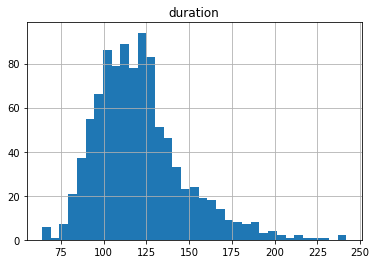

In [7]:
# Answer: 
movies.hist(column = 'duration', bins = 35)


#### Use a box plot to display that same data.

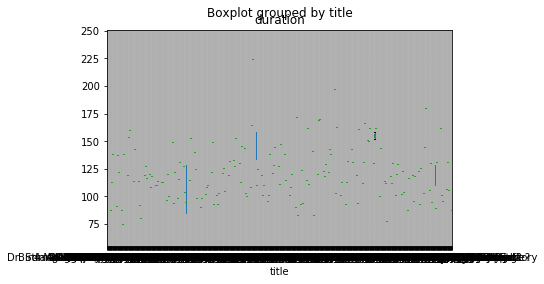

In [8]:
# Answer:
#df.boxplot(by ='day', column =['total_bill'], grid = False) 
movies.boxplot(by = 'title', column = ['duration'], grid = True)

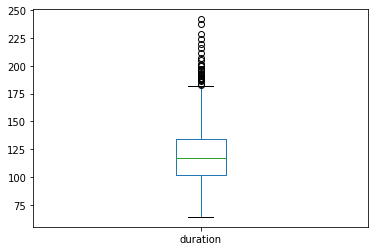

In [13]:
# this one is a better visualisation
movies['duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [14]:
# Answer:
movies.groupby('content_rating').content_rating.count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Title Count')

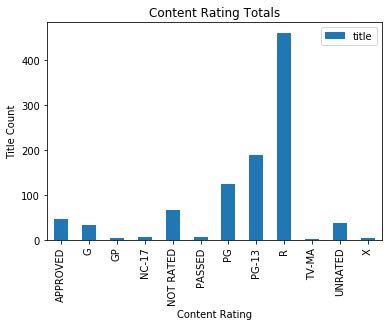

In [16]:
# Answer:
movies[['content_rating', 'title']].groupby('content_rating').count().plot(kind='bar', title='Content Rating Totals')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [17]:
# Answer: 
movies['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')

0          R
1          R
2          R
3      PG-13
4          R
       ...  
974       PG
975       PG
976    PG-13
977       PG
978        R
Name: content_rating, Length: 979, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [18]:
# Answer:
movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17')

0          R
1          R
2          R
3      PG-13
4          R
       ...  
974       PG
975       PG
976    PG-13
977       PG
978        R
Name: content_rating, Length: 979, dtype: object

#### Count the number of missing values in each column.

In [19]:
# Answer:
movies.isnull().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [20]:
# Answer:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [21]:
movies[movies['content_rating'].isnull()]
movies.at[(187,649), 'content_rating'] = 'PG'
movies.at[936, 'content_rating'] = 'PG-13'

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [24]:
movies[movies['duration'] >= 120].mean()

star_rating      7.948899
duration       142.458150
dtype: float64

In [25]:
movies[movies['duration'] < 120].mean()

star_rating      7.838667
duration       102.405714
dtype: float64

In [26]:
# Answer:
print('Avg. star rating for movies 2 hours or longer: ', movies[movies['duration'] >= 120]['star_rating'].mean(), 
 '\nAvg. star rating for movies shorter than 2 hours: ', movies[movies['duration'] < 120]['star_rating'].mean())

Avg. star rating for movies 2 hours or longer:  7.948898678414082 
Avg. star rating for movies shorter than 2 hours:  7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

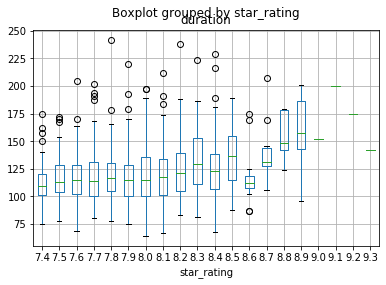

In [27]:
# Answer:
movies.boxplot(column='duration', by='star_rating');

#### Calculate the average duration for each genre.

In [28]:
# Answer:
movies[['duration', 'genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

Text(0, 0.5, 'Duration')

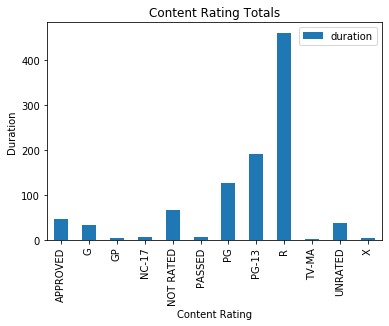

In [30]:
# Answer:
movies[['content_rating', 'duration']].groupby('content_rating').count().plot(kind='bar', title='Content Rating Totals')
plt.xlabel('Content Rating')
plt.ylabel('Duration')

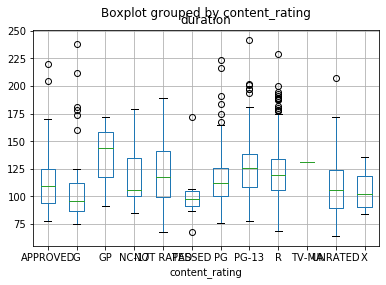

In [29]:
movies.boxplot(column='duration', by='content_rating')

#### Determine the top rated movie (by star rating) for each genre.

In [49]:
# Answer:
movies.sort_values('star_rating', ascending=False).groupby('genre')['title', 'star_rating'].first()

C:\Users\Orupoldl\Documents\Lynda Temp\Study\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [51]:
# Answer:
duplicate_movies = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
duplicate_movies.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [65]:
# Answer:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [66]:
relevant_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(relevant_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [60]:
# Answer:
genres = movies['genre'].value_counts()[movies['genre'].value_counts() > 10].index
movies[movies['genre'].isin(genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [67]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [69]:
# Answer:
genre_means = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_means[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [101]:
# top movie count per actor/actress

def repp(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]
    
movies_series = movies['actors_list'].apply(repp)

actors_list = []
for movie_actors in movies_series:
    actors_list.append([e.strip() for e in movie_actors.split(',')])
    
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1

listofActors = sorted(actor_dict.items(), reverse=True, key=lambda x: x[1])

for elem in listofActors :
    print(elem[0] , 'has acted in' , elem[1], 'movies.')

Robert De Niro has acted in 18 movies.
Clint Eastwood has acted in 14 movies.
Brad Pitt has acted in 14 movies.
Tom Hanks has acted in 14 movies.
Al Pacino has acted in 13 movies.
Johnny Depp has acted in 12 movies.
Christian Bale has acted in 11 movies.
Leonardo DiCaprio has acted in 11 movies.
Dustin Hoffman has acted in 11 movies.
Harrison Ford has acted in 10 movies.
James Stewart has acted in 10 movies.
Julianne Moore has acted in 10 movies.
Denzel Washington has acted in 10 movies.
Jack Nicholson has acted in 9 movies.
Russell Crowe has acted in 9 movies.
Sean Connery has acted in 9 movies.
Ed Harris has acted in 9 movies.
Ethan Hawke has acted in 9 movies.
Morgan Freeman has acted in 8 movies.
Ian McKellen has acted in 8 movies.
Matt Damon has acted in 8 movies.
Cary Grant has acted in 8 movies.
Kate Winslet has acted in 8 movies.
Michael Caine has acted in 8 movies.
Bruce Willis has acted in 8 movies.
Robert Downey Jr. has acted in 8 movies.
Jake Gyllenhaal has acted in 8 movie

Justin Theroux has acted in 2 movies.
Craig T. Nelson has acted in 2 movies.
Colin Farrell has acted in 2 movies.
Brendan Gleeson has acted in 2 movies.
Jennifer Aniston has acted in 2 movies.
Jon Voight has acted in 2 movies.
John Belushi has acted in 2 movies.
Emily Blunt has acted in 2 movies.
Zach Galifianakis has acted in 2 movies.
Will Smith has acted in 2 movies.
Thandie Newton has acted in 2 movies.
Jet Li has acted in 2 movies.
Marisa Tomei has acted in 2 movies.
Evan Rachel Wood has acted in 2 movies.
Marisa Paredes has acted in 2 movies.
Tahar Rahim has acted in 2 movies.
Zoe Saldana has acted in 2 movies.
Gwyneth Paltrow has acted in 2 movies.
Yul Brynner has acted in 2 movies.
Jamie Lee Curtis has acted in 2 movies.
Greg Kinnear has acted in 2 movies.
Burt Reynolds has acted in 2 movies.
u"Brian O'Halloran" has acted in 2 movies.
Jeff Anderson has acted in 2 movies.
Donald Sutherland has acted in 2 movies.
Jim Sturgess has acted in 2 movies.
Kenneth Branagh has acted in 2 

George Segal has acted in 1 movies.
John Gielgud has acted in 1 movies.
Candice Bergen has acted in 1 movies.
Natalya Bondarchuk has acted in 1 movies.
Donatas Banionis has acted in 1 movies.
J\xfcri J\xe4rvet has acted in 1 movies.
Harry Dean Stanton has acted in 1 movies.
Nastassja Kinski has acted in 1 movies.
Dean Stockwell has acted in 1 movies.
Judy Garland has acted in 1 movies.
Frank Morgan has acted in 1 movies.
Ray Bolger has acted in 1 movies.
Seung-yeon Lee has acted in 1 movies.
Hyun-kyoon Lee has acted in 1 movies.
Hyuk-ho Kwon has acted in 1 movies.
Ellar Coltrane has acted in 1 movies.
Timothy Bottoms has acted in 1 movies.
Robert Walker has acted in 1 movies.
Ruth Roman has acted in 1 movies.
Burl Ives has acted in 1 movies.
Anita Ekberg has acted in 1 movies.
Brigitte Lin has acted in 1 movies.
Robert Mitchum has acted in 1 movies.
Lillian Gish has acted in 1 movies.
Sa\xefd Taghmaoui has acted in 1 movies.
Simon Yam has acted in 1 movies.
Siu-Wong Fan has acted in 1 

Mich\xe8le Caucheteux has acted in 1 movies.
Michel Robin has acted in 1 movies.
Chete Lera has acted in 1 movies.
Elizabeth Banks has acted in 1 movies.
Edward Fox has acted in 1 movies.
Terence Alexander has acted in 1 movies.
Michel Auclair has acted in 1 movies.
Jack Albertson has acted in 1 movies.
Peter Ostrum has acted in 1 movies.
Leopold Stokowski has acted in 1 movies.
Deems Taylor has acted in 1 movies.
Corey Burton has acted in 1 movies.
Sh\xfbichir\xf4 Moriyama has acted in 1 movies.
Tokiko Kat\xf4 has acted in 1 movies.
Sanshi Katsura has acted in 1 movies.
Fernando Rey has acted in 1 movies.
David Thewlis has acted in 1 movies.
Rupert Friend has acted in 1 movies.
Domhnall Gleeson has acted in 1 movies.
Isabella Rossellini has acted in 1 movies.
Kyle MacLachlan has acted in 1 movies.
Paddy Considine has acted in 1 movies.
Djimon Houns has acted in 1 movies.
Russell Means has acted in 1 movies.
Jared Gilman has acted in 1 movies.
Kara Hayward has acted in 1 movies.
Sal Mi

Milla Jovovich has acted in 1 movies.
David Alan Basche has acted in 1 movies.
Olivia Thirlby has acted in 1 movies.
Liza Col\xf3n-Zayas has acted in 1 movies.
Ni Ni has acted in 1 movies.
Xinyi Zhang has acted in 1 movies.
Bela Lugosi has acted in 1 movies.
Helen Chandler has acted in 1 movies.
David Manners has acted in 1 movies.
Marianna Hill has acted in 1 movies.
Mary Stuart Masterson has acted in 1 movies.
Jackie Earle Haley has acted in 1 movies.
Carla Gugino has acted in 1 movies.
Jessica Biel has acted in 1 movies.
Andy Garcia has acted in 1 movies.
Anjelica Huston has acted in 1 movies.
Sebastian Cabot has acted in 1 movies.
Louis Prima has acted in 1 movies.
Beno\xeet Poelvoorde has acted in 1 movies.
Jacqueline Poelvoorde-Pappaert has acted in 1 movies.
Nelly Pappaert has acted in 1 movies.
Demi Moore has acted in 1 movies.
Jackie Chan has acted in 1 movies.
Ho-Sung Pak has acted in 1 movies.
Lung Ti has acted in 1 movies.
Khalid Abdalla has acted in 1 movies.
Ahmad Khan Ma

Tamara Tunie has acted in 1 movies.
